In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [2]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype("float32")/255.0   # normalize
x_test = x_test.astype("float32")/255.0     # normalize

CNN

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)
print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(lr=0.002,momentum=0.0002, name='SGD'),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=50, epochs=100, verbose=2,validation_data=(x_test,y_test))
#model.evaluate(x_test, y_test, batch_size=50, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [4]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
import numpy as np
import matplotlib.pyplot as plt

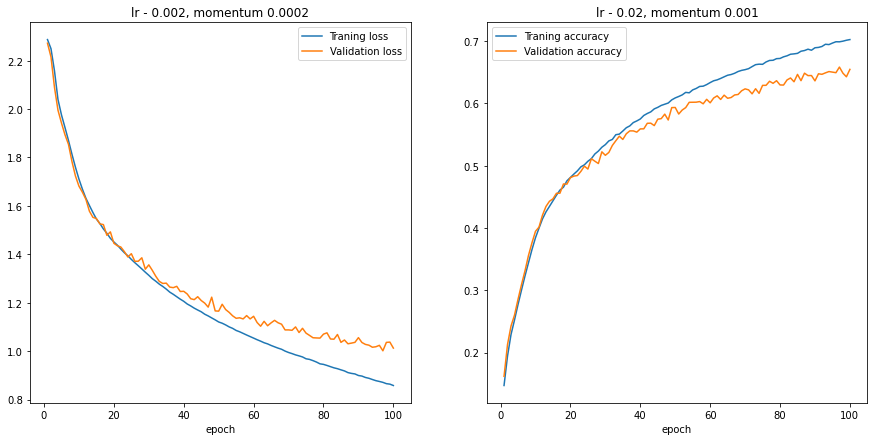

In [10]:
x_axis = np.arange(1,101,1)
fig, axes = plt.subplots(1,2,figsize=(15,7))
axes[0].plot(x_axis,history.history['loss'],label='Traning loss')
axes[0].plot(x_axis,history.history['val_loss'],label='Validation loss')
axes[0].legend()
axes[0].set_xlabel('epoch')
axes[0].set_title('lr - 0.002, momentum 0.0002')
axes[1].plot(x_axis,history.history['accuracy'],label='Traning accuracy')
axes[1].plot(x_axis,history.history['val_accuracy'],label='Validation accuracy')
axes[1].legend()
axes[1].set_xlabel('epoch')
axes[1].set_title('lr - 0.02, momentum 0.001')
plt.show()
